In [3]:
import pandas as pd

seed = 's1'

# Bipedal Hardcore
# base = '../../../datalake/v0_1_3/standard/data/xbipedal/initialconditions'
# n_features = 200
# threshold = 20

# Double Pole
base = '../../../datalake/data_baseline/data/xdpole/initialconditions'
n_features = 6
threshold = 500

ic = pd.read_csv(f"{base}/{seed}_run.csv")

In [4]:
features = ic.columns[[i for i in range(n_features)]]
target = 'performance'
X, y = ic[features], ic[target]

start = 1000 * 10
X, y = X[start:], y[start:]

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

if n_features > 10:
    k = np.ceil(np.sqrt(n_features))
else:
    k = n_features

s = SelectKBest(score_func=f_regression, k=int(k))
t = PolynomialFeatures(2)

if n_features < 10:
    X = t.fit_transform(X, y)
else:
    X = s.fit_transform(X, y)

ic = pd.DataFrame(X)
ic['performance'] = y 

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '24'}>],
       [<Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,
        <Axes

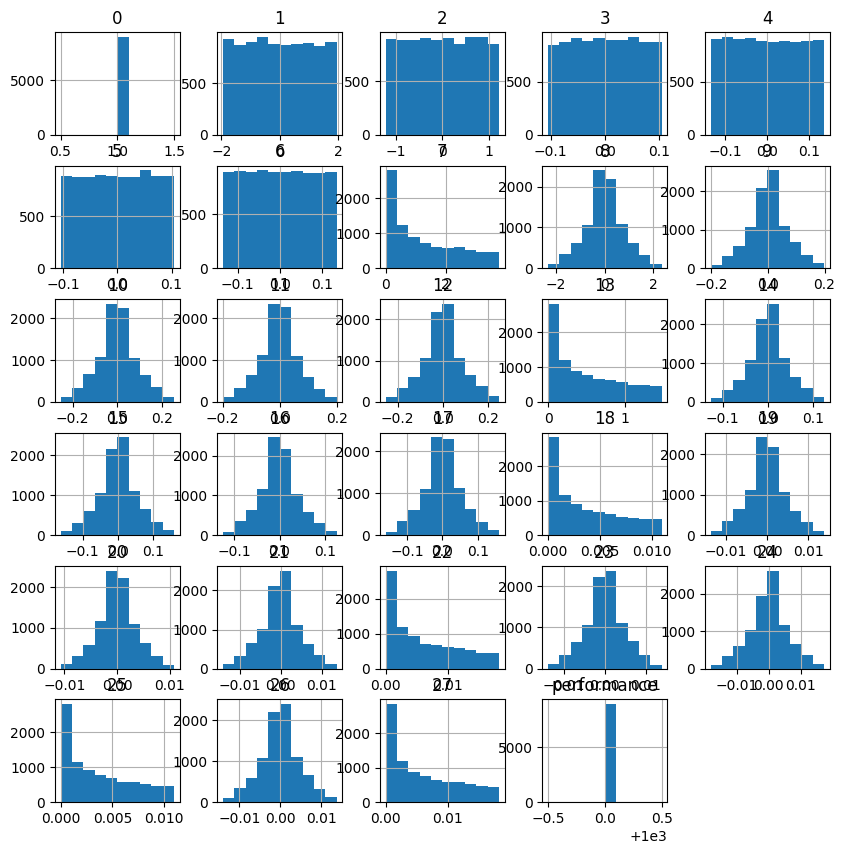

In [6]:
ic_high = ic.query(f"performance > {threshold}")

ic_high.hist(figsize=(10,10))

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '24'}>],
       [<Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,
        <Axes

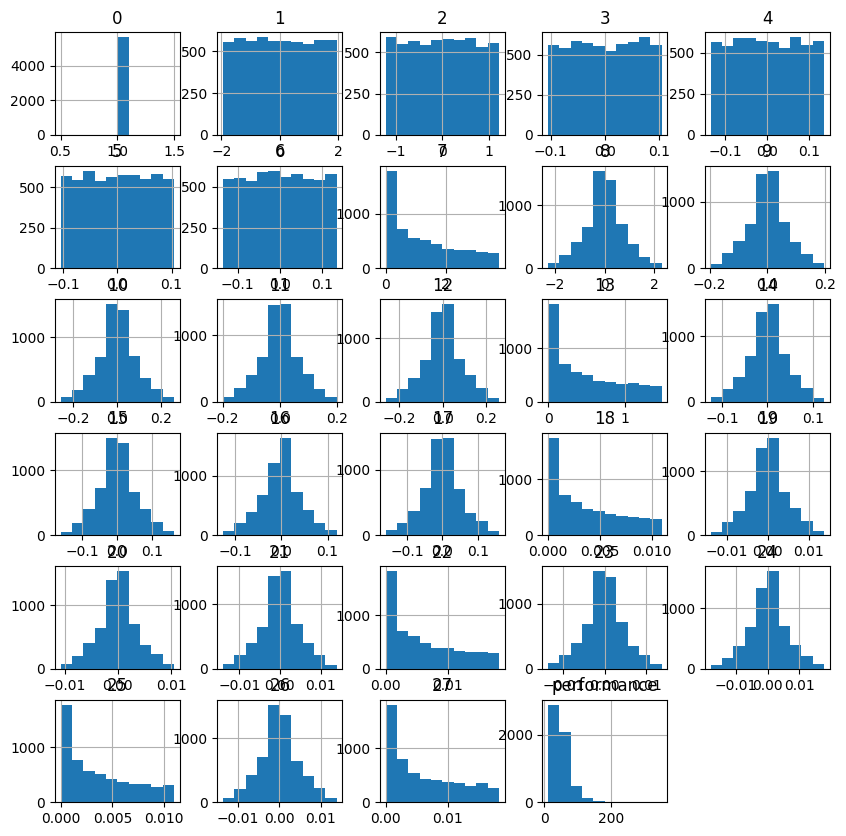

In [7]:
ic_low = ic.query(f"performance < {threshold}")

ic_low.hist(figsize=(10,10))

<Axes: xlabel='performance', ylabel='Count'>

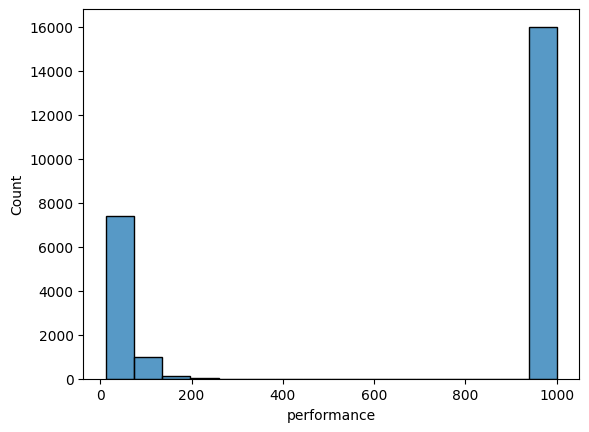

In [8]:
import seaborn as sns

sns.histplot(y)

<Axes: xlabel='performance', ylabel='Count'>

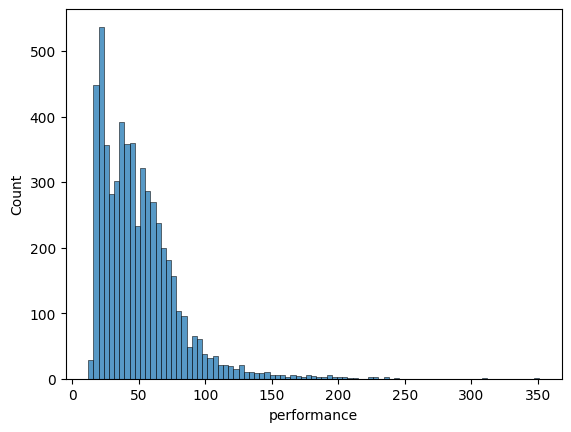

In [9]:
sns.histplot(ic_low['performance'])